### EDA1

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# globals
FIGSIZE = (9, 6)

FILE_TRAIN = "train.csv"

In [3]:
train_orig = pd.read_csv(FILE_TRAIN)

In [4]:
# feature engineering
# feature engineering
train_orig['datetime'] = pd.to_datetime(train_orig['datetime'])

# this way I add 3 engineered features
train_orig['hour'] = train_orig['datetime'].dt.hour
train_orig['day'] = train_orig['datetime'].dt.day

all_columns = train_orig.columns

In [5]:
train_orig.head(24)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,1
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,1
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,1
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,1


In [6]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int64         
 13  day         10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 1.2 MB


In [7]:
for col in all_columns:
    print('# distinct values for:', col, 'is', train_orig[col].nunique())

# distinct values for: datetime is 10886
# distinct values for: season is 4
# distinct values for: holiday is 2
# distinct values for: workingday is 2
# distinct values for: weather is 4
# distinct values for: temp is 49
# distinct values for: atemp is 60
# distinct values for: humidity is 89
# distinct values for: windspeed is 28
# distinct values for: casual is 309
# distinct values for: registered is 731
# distinct values for: count is 822
# distinct values for: hour is 24
# distinct values for: day is 19


In [8]:
# colonne da ignorare
del_columns = ['datetime', 'casual', 'registered']

TARGET = "count"

cat_cols = ['season', 'holiday','workingday', 'weather', 'hour', 'day']

num_cols = set(all_columns) - set([TARGET]) - set(del_columns) - set(cat_cols)

print('Tutte le colonne:', len(all_columns))
print('Colonne ignorate:', len(del_columns))
print('target:', len([TARGET]))
print('Colonne cat:', len(cat_cols))
print('Colonne num:', len(num_cols))

Tutte le colonne: 14
Colonne ignorate: 3
target: 1
Colonne cat: 6
Colonne num: 4


In [9]:
train_orig.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.006546,0.001729
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354,-0.015877
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780,0.009829
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.022740,-0.007890
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430,0.015551
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343,0.011866
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011,-0.011335
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631,0.036157
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045,0.014109
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540,0.019111


In [10]:
train_orig.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,9.992559
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,5.476608
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,5.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,10.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,15.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,19.000000


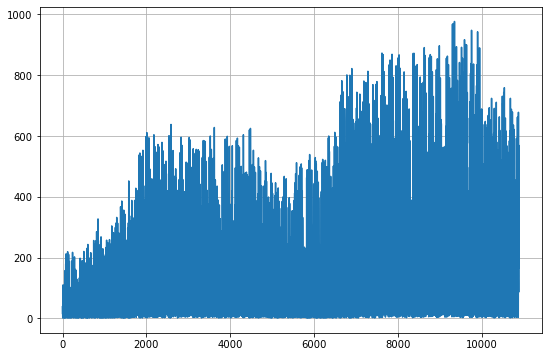

In [11]:
%matplotlib inline
# plot the temporal behaviour for count

plt.figure(figsize=FIGSIZE)
plt.plot(train_orig['count'])
plt.grid(True)
plt.show()

In [12]:
# so, there is a trend 

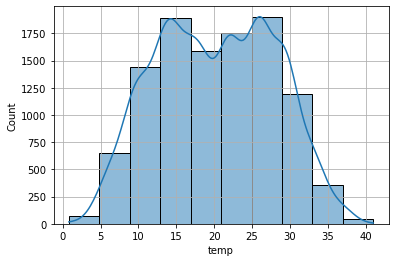

In [13]:
sns.histplot(train_orig['temp'], bins=10, kde=True)
plt.grid(True)
plt.show();

In [14]:
# voglio esplorare la correlazione tra count ed hour
# raggruppo per hour e sommo i corrispondenti count
x = train_orig.groupby('hour')['count'].sum().index
y = train_orig.groupby('hour')['count'].sum().values

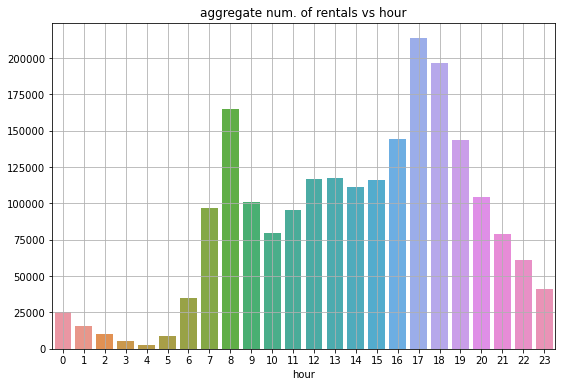

In [15]:
plt.figure(figsize=FIGSIZE)
plt.title("aggregate num. of rentals vs hour")
sns.barplot(x=x, y=y)
plt.grid(True)
plt.show();